In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = titanic_data.Survived

In [5]:
X = pd.get_dummies(X)

In [6]:
X = X.fillna({'Age': X.Age.median()})

In [7]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split = 65, min_samples_leaf = 12)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=12,
                       min_samples_split=65)

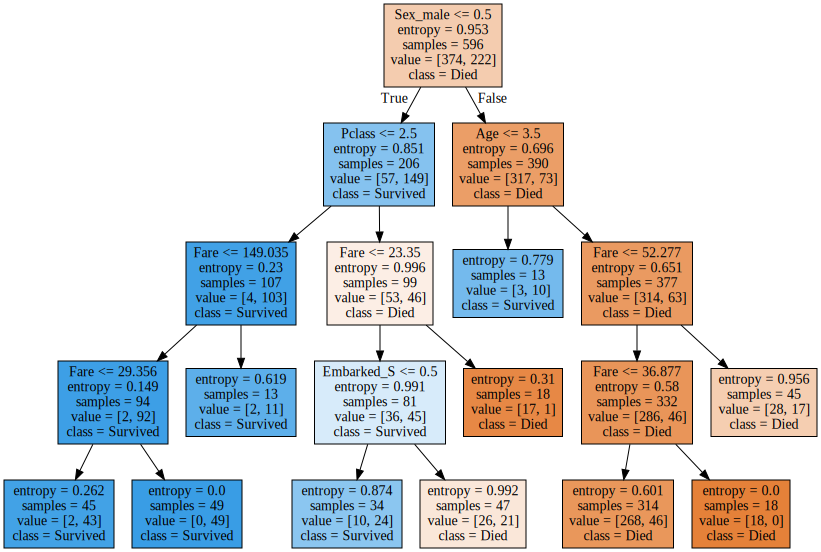

In [11]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [36]:
params = {'max_depth': range(1,5), 'min_samples_split': range(50, 100, 5), 'min_samples_leaf': range(5, 20)}

In [37]:
random_clf = RandomizedSearchCV(clf, param_distributions=params, cv=5)

In [38]:
random_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=4,
                                                    min_samples_leaf=5,
                                                    min_samples_split=60),
                   param_distributions={'max_depth': range(1, 5),
                                        'min_samples_leaf': range(5, 20),
                                        'min_samples_split': range(50, 100, 5)})

In [39]:
best_clf1 = random_clf.best_params_

In [40]:
best_clf1

{'min_samples_split': 60, 'min_samples_leaf': 15, 'max_depth': 4}

In [41]:
grid_clf = GridSearchCV(clf, param_grid=params, cv=5)

In [42]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              min_samples_leaf=5,
                                              min_samples_split=60),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': range(5, 20),
                         'min_samples_split': range(50, 100, 5)})

In [43]:
best_clf2 = grid_clf.best_params_
best_clf2

{'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 65}

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf_rf = RandomForestClassifier()

In [14]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [15]:
grid_clf_rf = GridSearchCV(clf_rf, param_grid=parametrs, cv=5)

In [16]:
grid_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [17]:
grid_clf_rf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [20]:
best_grid_clf_rf = grid_clf_rf.best_estimator_

In [21]:
best_grid_clf_rf.score(X_test, y_test)

0.8135593220338984

In [22]:
feature_importances = best_grid_clf_rf.feature_importances_

In [23]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances})

In [24]:
feature_importances_df.head()

,features,feature_importances
0,Pclass,0.124362
1,Age,0.156587
2,SibSp,0.054978
3,Parch,0.042124
4,Fare,0.168286


In [25]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.246347
4,Fare,0.168286
1,Age,0.156587
5,Sex_female,0.150727
0,Pclass,0.124362
2,SibSp,0.054978
3,Parch,0.042124
9,Embarked_S,0.028168
7,Embarked_C,0.021734
8,Embarked_Q,0.006686


In [27]:
heart = pd.read_csv('heart.csv')

In [28]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
heart_x = heart.drop(['target'], axis=1)
heart_y = heart.target

In [40]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [41]:
rf.fit(heart_x, heart_y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [33]:
rf_importances = rf.feature_importances_

In [34]:
feature_importances_df = pd.DataFrame({'importances': list(heart_x),
                                      'feature_importances':rf_importances })

In [36]:
feature_importances_df

,importances,feature_importances
0,age,0.043441
1,sex,0.039990
2,cp,0.139983
3,trestbps,0.053569
4,chol,0.056887
5,fbs,0.008493
6,restecg,0.018583
7,thalach,0.129550
8,exang,0.048079
9,oldpeak,0.116645


<AxesSubplot:>

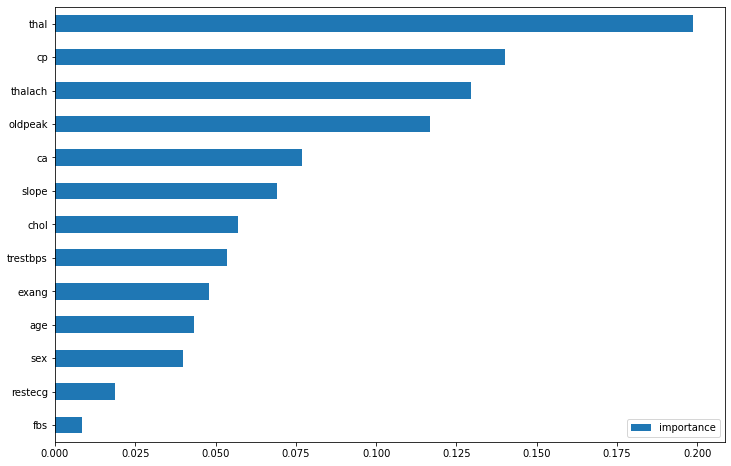

In [42]:
imp = pd.DataFrame(rf.feature_importances_, index=heart_x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [39]:
imp

,importance
age,0.043441
sex,0.039990
cp,0.139983
trestbps,0.053569
chol,0.056887
fbs,0.008493
restecg,0.018583
thalach,0.129550
exang,0.048079
oldpeak,0.116645
